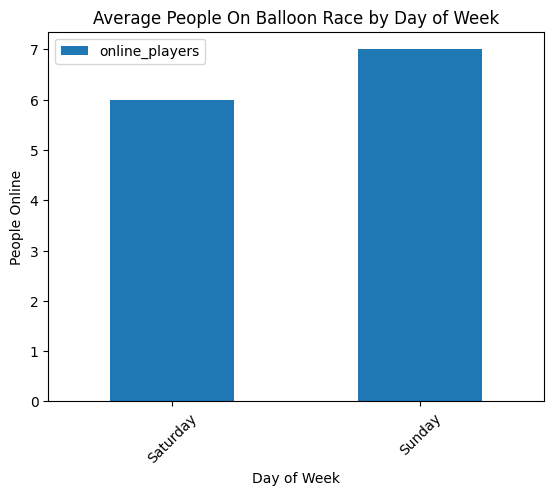

In [2]:
# find out when people are on

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas

df = pandas.read_csv('tf2_balloon_log.txt', header=None)

df['date'] = df[0].str.slice(0, 10)
df['date'] = pandas.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df[0].str.slice(11, 13).astype(int)
df['hour'] = df['hour'].apply(
    lambda x: f"{x % 12 if x % 12 != 0 else 12}{' AM' if x < 12 else ' PM'}"
)
df['online_players'] = df[0].str.contains('Found people playing Balloon Race').astype(int)

graph_df = df[['date', 'day_of_week', 'online_players', 'hour']]

day_of_week_avg = (
    graph_df.groupby('day_of_week')['online_players'].sum() /
    graph_df.groupby('day_of_week')['date'].nunique()
).reset_index(name='online_players')


plot = day_of_week_avg.plot(
    x='day_of_week', y='online_players', kind='bar'
)
plt.xticks(rotation=45)
plt.ylabel('People Online') 
plt.xlabel('Day of Week') 

plt.title('Average People On Balloon Race by Day of Week')
plt.show()

# this needs to be an average for multiple weeks

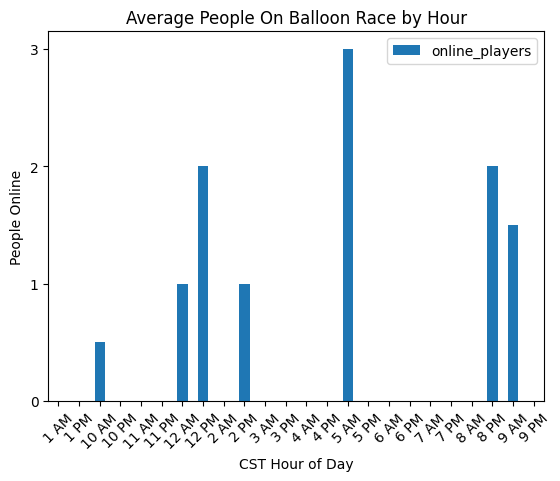

In [8]:
hourly_avg = (
    graph_df.groupby('hour')['online_players'].sum() /
    graph_df.groupby('hour')['date'].nunique()
).reset_index(name='online_players')


plot = hourly_avg.plot(
    x='hour', y='online_players', kind='bar'
)
plt.xticks(rotation=45)
plt.ylabel('People Online') 
plt.xlabel('CST Hour of Day') 

max_value = hourly_avg['online_players'].max()
plt.yticks(np.arange(0, np.ceil(max_value) + 1, 1))
plt.title('Average People On Balloon Race by Hour')
plt.show()


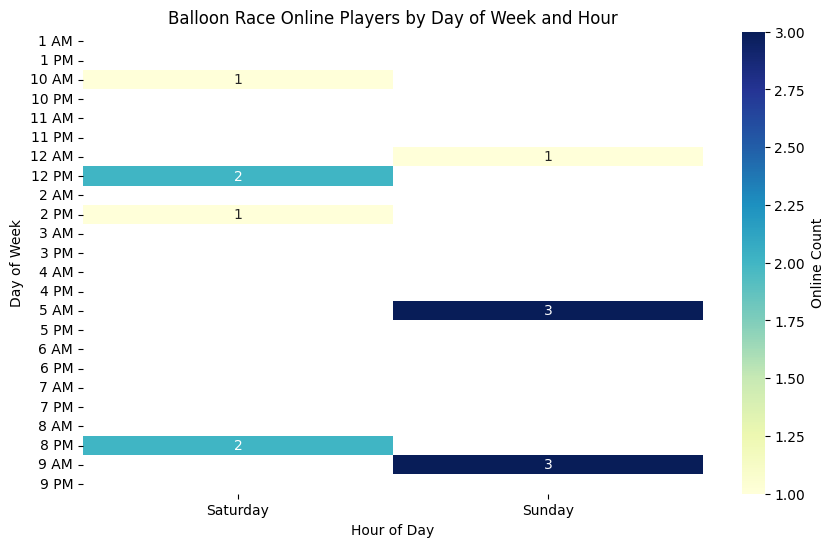

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to have 'hour' as columns and 'day_of_week' as rows
heatmap_data = graph_df.pivot_table(
    index='hour',
    columns='day_of_week',
    values='online_players', 
    aggfunc='sum',  # You can use sum, mean, or another aggregation function
    fill_value=0  # Fill missing values with 0 (or another value)
)

# Create a mask where values are 0 (to make those cells white)
mask = heatmap_data == 0

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Online Count'}, mask=mask)

# Replace 0 with empty strings in the annotations
for text in plt.gca().texts:
    if text.get_text() == "0":
        text.set_text("")  # Set empty string for 0 values

# Add labels and title
plt.title('Balloon Race Online Players by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Show the plot
plt.show()


In [11]:
# could also do by month?

df['server'] = df[0].str.slice(13, 22)
df[0]

0      2024-12-07 09:50:01 - INFO - No one playing ba...
1      2024-12-07 09:55:01 - INFO - No one playing ba...
2      2024-12-07 10:00:02 - INFO - No one playing ba...
3      2024-12-07 10:05:02 - INFO - No one playing ba...
4      2024-12-07 10:10:02 - INFO - No one playing ba...
                             ...                        
313    2024-12-08 09:55:02 - INFO - Found people play...
314    2024-12-08 09:55:02 - INFO - Weasel's Balloon ...
315           2024-12-08 09:55:02 - INFO - Sending email
316    2024-12-08 10:00:02 - INFO - No one playing ba...
317    2024-12-08 10:05:03 - INFO - No one playing ba...
Name: 0, Length: 318, dtype: object